In [1]:
# installing the Kaggle library
%pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:09<00:00, 25.0MB/s]
100% 2.70G/2.70G [02:09<00:00, 22.3MB/s]


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/new-plant-diseases-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [6]:
train_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path="/content/test/test"
image_path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

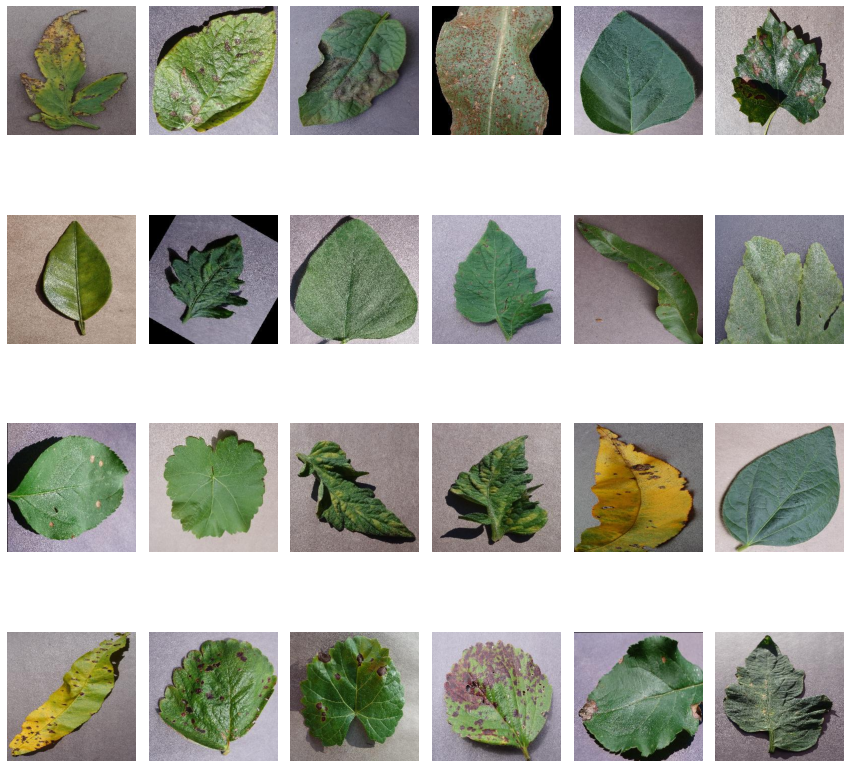

In [7]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [8]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Apple___Black_rot', 'Tomato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___healthy', 'Peach___healthy', 'Tomato___Septoria_leaf_spot', 'Potato___healthy', 'Grape___Esca_(Black_Measles)', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Soybean___healthy', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Squash___Powdery_mildew', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___healthy', 'Tomato___Late_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Pepper,_bell___healthy', 'Grape___Black_rot'

In [9]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
print(numberof_images)    
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])


{'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1961, 'Apple___Apple_scab': 2016, 'Apple___Black_rot': 1987, 'Tomato___Early_blight': 1920, 'Pepper,_bell___Bacterial_spot': 1913, 'Blueberry___healthy': 1816, 'Peach___Bacterial_spot': 1838, 'Tomato___Target_Spot': 1827, 'Tomato___healthy': 1926, 'Peach___healthy': 1728, 'Tomato___Septoria_leaf_spot': 1745, 'Potato___healthy': 1824, 'Grape___Esca_(Black_Measles)': 1920, 'Cherry_(including_sour)___Powdery_mildew': 1683, 'Potato___Early_blight': 1939, 'Tomato___Leaf_Mold': 1882, 'Tomato___Bacterial_spot': 1702, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642, 'Tomato___Tomato_mosaic_virus': 1790, 'Strawberry___healthy': 1824, 'Soybean___healthy': 2022, 'Apple___Cedar_apple_rust': 1760, 'Corn_(maize)___Northern_Leaf_Blight': 1908, 'Squash___Powdery_mildew': 1736, 'Corn_(maize)___healthy': 1859, 'Tomato___Spider_mites Two-spotted_spider_mite': 1741, 'Grape___healthy': 1692, 'Orange___Haunglongbing_(Citrus_greening)': 2010, 'Apple___hea

In [10]:
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class

,Number of images
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1961
Apple___Apple_scab,2016
Apple___Black_rot,1987
Tomato___Early_blight,1920
"Pepper,_bell___Bacterial_spot",1913
Blueberry___healthy,1816
Peach___Bacterial_spot,1838
Tomato___Target_Spot,1827
Tomato___healthy,1926
Peach___healthy,1728


In [11]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 38


In [12]:
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

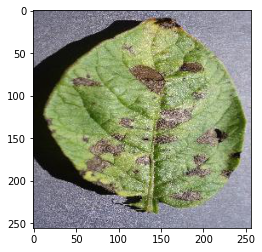

In [13]:

img = mpimg.imread('/content/test/test/PotatoEarlyBlight2.JPG')
imgplt = plt.imshow(img)
plt.show()

In [14]:
def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))

In [15]:
path='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
df = create_dataframe(os.path.join(path ,'train'))
df_test=create_dataframe(os.path.join(path ,'valid'))

In [16]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.20, random_state=0)

In [17]:
df_train.tail()

,filename,class
21243,/content/New Plant Diseases Dataset(Augmented)...,Potato___healthy
45891,/content/New Plant Diseases Dataset(Augmented)...,Corn_(maize)___healthy
42613,/content/New Plant Diseases Dataset(Augmented)...,Squash___Powdery_mildew
43567,/content/New Plant Diseases Dataset(Augmented)...,Squash___Powdery_mildew
68268,/content/New Plant Diseases Dataset(Augmented)...,Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56236 entries, 68796 to 68268
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  56236 non-null  object
 1   class     56236 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [20]:
df_train.head()

,filename,class
68796,/content/New Plant Diseases Dataset(Augmented)...,Raspberry___healthy
28704,/content/New Plant Diseases Dataset(Augmented)...,Tomato___Leaf_Mold
9431,/content/New Plant Diseases Dataset(Augmented)...,"Pepper,_bell___Bacterial_spot"
69980,/content/New Plant Diseases Dataset(Augmented)...,Raspberry___healthy
68527,/content/New Plant Diseases Dataset(Augmented)...,Raspberry___healthy


In [18]:

IMG_DIM = 224
DATA_PATH = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
CLASSES = sorted(
                 ['Apple___Apple_scab' ,
                 'Apple___Black_rot' ,
                 'Apple___Cedar_apple_rust',
                 'Apple___healthy',
                 'Blueberry___healthy',
                 'Cherry_(including_sour)___Powdery_mildew',
                 'Cherry_(including_sour)___healthy',
                 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
                 'Corn_(maize)___Common_rust_' ,
                 'Corn_(maize)___Northern_Leaf_Blight',
                 'Corn_(maize)___healthy' ,
                 'Grape___Black_rot'  ,
                 'Grape___Esca_(Black_Measles)' ,
                 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' , 
                 'Grape___healthy',
                 'Orange___Haunglongbing_(Citrus_greening)' ,
             
                 'Peach___Bacterial_spot',
                 'Peach___healthy',
                 'Pepper,_bell___Bacterial_spot',
                 'Pepper,_bell___healthy'  ,
                 'Potato___Early_blight' ,
                 'Potato___Late_blight' , 
                 'Potato___healthy' ,
                 'Raspberry___healthy' ,
                 'Soybean___healthy',
                 'Squash___Powdery_mildew' ,
                 'Strawberry___Leaf_scorch',
                 'Strawberry___healthy'  , 
                 'Tomato___Bacterial_spot', 
                 'Tomato___Early_blight',
                 'Tomato___Late_blight',
                 'Tomato___Leaf_Mold',
                 'Tomato___Septoria_leaf_spot',
                 'Tomato___Spider_mites Two-spotted_spider_mite',
                 'Tomato___Target_Spot', 
                 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato___Tomato_mosaic_virus',
                 'Tomato___healthy' ])
print(CLASSES)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
len(CLASSES)

38

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# creating dataframes
df = create_dataframe(os.path.join(DATA_PATH, 'train'))
df_valid = create_dataframe(os.path.join(DATA_PATH, 'valid'))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56236 entries, 68796 to 68268
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  56236 non-null  object
 1   class     56236 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [ ]:
df_train.head(10)

,filename,class
68796,/content/New Plant Diseases Dataset(Augmented)...,Apple___healthy
28704,/content/New Plant Diseases Dataset(Augmented)...,Strawberry___healthy
9431,/content/New Plant Diseases Dataset(Augmented)...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
69980,/content/New Plant Diseases Dataset(Augmented)...,Apple___healthy
68527,/content/New Plant Diseases Dataset(Augmented)...,Apple___healthy
64578,/content/New Plant Diseases Dataset(Augmented)...,Grape___Black_rot
16598,/content/New Plant Diseases Dataset(Augmented)...,Potato___Early_blight
24291,/content/New Plant Diseases Dataset(Augmented)...,Tomato___Leaf_Mold
14780,/content/New Plant Diseases Dataset(Augmented)...,"Pepper,_bell___healthy"
6139,/content/New Plant Diseases Dataset(Augmented)...,Potato___healthy


In [ ]:
df_train.tail(10)

,filename,class
52620,/content/New Plant Diseases Dataset(Augmented)...,Tomato___Septoria_leaf_spot
39512,/content/New Plant Diseases Dataset(Augmented)...,Grape___Esca_(Black_Measles)
48600,/content/New Plant Diseases Dataset(Augmented)...,Strawberry___Leaf_scorch
55026,/content/New Plant Diseases Dataset(Augmented)...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
41993,/content/New Plant Diseases Dataset(Augmented)...,Tomato___Spider_mites Two-spotted_spider_mite
21243,/content/New Plant Diseases Dataset(Augmented)...,Raspberry___healthy
45891,/content/New Plant Diseases Dataset(Augmented)...,Peach___healthy
42613,/content/New Plant Diseases Dataset(Augmented)...,Tomato___Spider_mites Two-spotted_spider_mite
43567,/content/New Plant Diseases Dataset(Augmented)...,Soybean___healthy
68268,/content/New Plant Diseases Dataset(Augmented)...,Orange___Haunglongbing_(Citrus_greening)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(
     rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
     shear_range=0.2, horizontal_flip=True,fill_mode='nearest')

In [23]:
IMG_DIM = 224

In [28]:
classes = list(train_gen.class_indices.keys())
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [26]:
train_gen = train_datagen.flow_from_dataframe(
    df_train,
    target_size=(IMG_DIM, IMG_DIM),
    batch_size=20,
    classes=CLASSES,
    shuffle=True 
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_val,
    target_size=(IMG_DIM, IMG_DIM),
    batch_size=20 ,
    classes=CLASSES,
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_test,
    target_size=(IMG_DIM, IMG_DIM),
    batch_size=20 ,
    classes=CLASSES,
    shuffle=True,
    class_mode="categorical"
    
)

Found 56236 validated image filenames belonging to 38 classes.
Found 14059 validated image filenames belonging to 38 classes.
Found 17572 validated image filenames belonging to 38 classes.


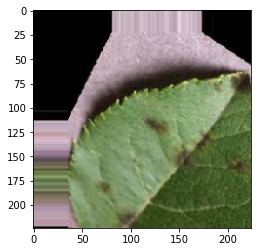

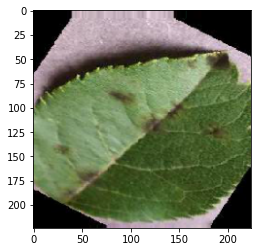

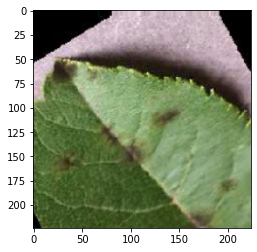

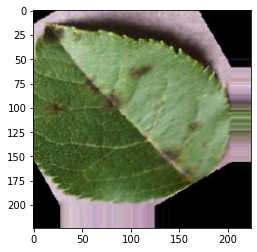

In [27]:

s="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(s, fname) for fname in os.listdir(s)]


img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(224, 224))

# Convert it to a Numpy array with shape (224, 224, 3)
x = image.img_to_array(img)

# Reshape it to (1, 224, 224, 3)
x = x.reshape((1,) + x.shape)


i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

In [29]:
train_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAvgPool2D, Dense ,Dropout ,BatchNormalization

In [31]:
from keras.backend import dropout
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.normalization import batch_normalization
pretrained = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False
)
pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(38, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

MODEL_PATH = 'saved-models/mobilenet'

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                             

In [32]:
train_number=train_gen.samples
train_number
batch_size=20

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=5,
                    steps_per_epoch=train_number//batch_size,
                    shuffle=True, 
                    batch_size = 20,
                    callbacks=[checkpoint])

Epoch 1/5
2811/2811 [==============================] - ETA: 0s - loss: 0.4830 - accuracy: 0.8488
Epoch 1: val_loss improved from inf to 0.51341, saving model to saved-models/mobilenet
2811/2811 [==============================] - 2545s 904ms/step - loss: 0.4830 - accuracy: 0.8488 - val_loss: 0.5134 - val_accuracy: 0.8463
Epoch 2/5
2811/2811 [==============================] - ETA: 0s - loss: 0.3182 - accuracy: 0.8960
Epoch 2: val_loss improved from 0.51341 to 0.33322, saving model to saved-models/mobilenet
2811/2811 [==============================] - 2520s 897ms/step - loss: 0.3182 - accuracy: 0.8960 - val_loss: 0.3332 - val_accuracy: 0.8931
Epoch 3/5
2811/2811 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9127
Epoch 3: val_loss improved from 0.33322 to 0.23665, saving model to saved-models/mobilenet
2811/2811 [==============================] - 2555s 909ms/step - loss: 0.2643 - accuracy: 0.9127 - val_loss: 0.2366 - val_accuracy: 0.9224
Epoch 4/5
2811/2811 [=====

In [ ]:
score, acc = model.evaluate(test_gen)
print('Test Loss =', score)
print('Test Accuracy =', acc) 

879/879 [==============================] - 506s 575ms/step - loss: 0.2656 - accuracy: 0.9175
Test Loss = 0.2655552327632904
Test Accuracy = 0.9174823760986328


In [ ]:
#print(MODEL_PATH)
#model.load_weights(MODEL_PATH)
model.evaluate(test_gen)

In [ ]:
from google.colab.patches import cv2_imshow 

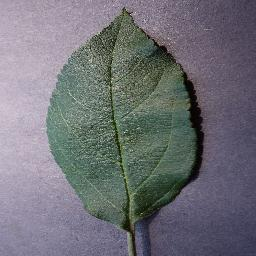

1/1 [==============================] - 0s 60ms/step
[[6.36834056e-06 9.70763358e-06 1.46941646e-04 9.99567807e-01
  2.66650630e-07 1.81965376e-07 1.93808402e-04 3.14657065e-08
  2.64640505e-08 8.92290899e-08 2.65972801e-07 1.65838543e-08
  2.53096513e-08 1.65774905e-09 1.80934689e-09 1.50881351e-05
  5.80127448e-07 4.90432067e-05 1.74543277e-06 4.07851743e-08
  3.53720897e-09 1.64448846e-08 4.42356395e-06 7.66532793e-08
  5.71879013e-07 5.20006971e-09 1.01273807e-08 6.23276808e-09
  1.05938916e-07 1.12530370e-06 2.50477661e-09 3.38879609e-08
  1.92809910e-08 1.99684095e-07 2.19192572e-07 4.57503830e-08
  5.77100465e-08 1.07368533e-06]]
3


In [ ]:
input_image = cv2.imread('/content/test/test/CornCommonRust2.JPG')
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 0:
  print('The image represents a Apple___Apple_scab disease')
elif input_pred_label == 1:
  print('The image represents a Apple___Black_rot disease')  
elif input_pred_label == 2:
  print('The image represents a Apple___Black_rot disease')
elif input_pred_label == 3:
  print('The image represents a Apple___healthy')
elif input_pred_label == 4:
  print('The image represents a Blueberry___healthy')
elif input_pred_label == 5:
  print('The image represents a Cherry_(including_sour)___Powdery_mildew')  
elif input_pred_label == 6:
  print('The image represents a Cherry_(including_sour)___healthy')
elif input_pred_label == 7:
  print('The image represents a Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')
elif input_pred_label == 8:
  print('The image represents a corn_(maize)___Common_rust_')
elif input_pred_label == 9:
  print('The image represents a corn_(maize)___Northern_Leaf_Blight')    
elif input_pred_label == 10:
  print('The image represents a Orange___Haunglongbing_(Citrus_greening)')
elif input_pred_label == 11:
  print('The image represents a corn_(maize)___healthy')
elif input_pred_label == 12:
  print('The image represents a Grape___Black_rot')
elif input_pred_label == 13:
  print('The image represents a Grape___Esca_(Black_Measles)')    
elif input_pred_label == 14:
  print('The image represents a rape___Leaf_blight_(Isariopsis_Leaf_Spot)')
elif input_pred_label == 15:
  print('The image represents a Grape___healthy')
elif input_pred_label == 16:
  print('The image represents a Peach___Bacterial_spot')  
elif input_pred_label == 17:
  print('The image represents a Peach___healthy')  
elif input_pred_label == 18:
  print('The image represents a Pepper,_bell___Bacterial_spot')
elif input_pred_label == 19:
  print('The image represents a Pepper,_bell___healthy')
elif input_pred_label == 20:
  print('The image represents a Potato___Early_blight')
elif input_pred_label == 21:
  print('The image represents a Potato___Late_blight')  
elif input_pred_label == 22:
  print('The image represents a Potato___healthy')
elif input_pred_label == 23:
  print('The image represents a Raspberry___healthy') 
elif input_pred_label == 24:
  print('The image represents a Soybean___healthy')  
elif input_pred_label == 25:
  print('The image represents a Squash___Powdery_mildew_')
elif input_pred_label == 26:
  print('The image represents a Strawberry___Leaf_scorch')
elif input_pred_label == 27:
  print('The image represents a Strawberry___healthy')
elif input_pred_label == 28:
  print('The image represents a Tomato___Bacterial_spot')  
elif input_pred_label == 29:
  print('The image represents a Tomato___Early_blight')
elif input_pred_label == 30:
  print('Tomato___Late_blight')   
elif input_pred_label == 31:
  print('The image represents a Tomato___Leaf_Mold')  
elif input_pred_label == 32:
  print('The image represents a CTomato___Septoria_leaf_spot')
elif input_pred_label == 33:
  print('The image represents a Tomato___Spider_mites Two-spotted_spider_mite')
elif input_pred_label == 34:
  print('The image represents a Tomato___Target_Spot')
elif input_pred_label == 35:
  print('The image represents a Tomato___Tomato_Yellow_Leaf_Curl_Virus')  
elif input_pred_label == 36:
  print('TTomato___Tomato_mosaic_virus')
elif input_pred_label == 37:
  print('The image represents a Tomato___healthy') 